# Data Cleaning

In [9]:
# Basic Data Handling
import pandas as pd
import numpy as np
# Visualization (for quick EDA checks)
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [10]:
# Loading Excel file
file_path = "Gender_Stats_EXCEL/Gender_StatsEXCEL.xlsx"
df = pd.read_excel(file_path)

df.head()

Country Name Country Code  \
0  Africa Eastern and Southern          AFE   
1  Africa Eastern and Southern          AFE   
2  Africa Eastern and Southern          AFE   
3  Africa Eastern and Southern          AFE   
4  Africa Eastern and Southern          AFE   

                                      Indicator Name  Indicator Code  1960  \
0  A woman can apply for a passport in the same w...  SG.APL.PSPT.EQ   NaN   
1  A woman can be "head of household" in the same...  SG.HLD.HEAD.EQ   NaN   
2  A woman can choose where to live in the same w...  SG.LOC.LIVE.EQ   NaN   
3  A woman can get a job in the same way as a man...  SG.GET.JOBS.EQ   NaN   
4  A woman can obtain a judgment of divorce in th...  SG.OBT.DVRC.EQ   NaN   

   1961  1962  1963  1964  1965  ...  2014  2015  2016  2017  2018  2019  \
0   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   
2   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   
3   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   
4   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   

   2020  2021  2022  2023  
0   NaN   NaN   NaN   NaN  
1   NaN   NaN   NaN   NaN  
2   NaN   NaN   NaN   NaN  
3   NaN   NaN   NaN   NaN  
4   NaN   NaN   NaN   NaN  

[5 rows x 68 columns]

In [5]:
# Checking shape and data types
print("Dataset shape:", df.shape)
df.info()

# Checking null values by column
df.isnull().sum().head(10)

# Preview unique indicators
df["Indicator Name"].nunique()
df["Indicator Name"].sample(5)

Dataset shape: (306340, 68)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306340 entries, 0 to 306339
Data columns (total 68 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    306340 non-null  object 
 1   Country Code    306340 non-null  object 
 2   Indicator Name  306340 non-null  object 
 3   Indicator Code  306340 non-null  object 
 4   1960            22304 non-null   float64
 5   1961            22276 non-null   float64
 6   1962            22432 non-null   float64
 7   1963            22489 non-null   float64
 8   1964            22523 non-null   float64
 9   1965            22614 non-null   float64
 10  1966            22741 non-null   float64
 11  1967            22683 non-null   float64
 12  1968            22758 non-null   float64
 13  1969            22851 non-null   float64
 14  1970            35840 non-null   float64
 15  1971            38547 non-null   float64
 16  1972            38401 non-nu

298007    Unmet need for contraception (% of married wom...
220264                        Population ages 40-44, female
91859     Most worrying financial issue: money to pay fo...
264088    Mortality rate attributed to unintentional poi...
248893    Knowledge of any method of contraception (% of...
Name: Indicator Name, dtype: object

In [7]:
df.dropna(how='all', inplace=True)#deleted all null rows
df.dropna(axis=1, how='all', inplace=True)

In [8]:
print("Duplicate rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

Duplicate rows: 0


In [18]:
# Reshape from wide to long format: year as a column
df_long = df.melt(
    id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"],
    var_name="Year",
    value_name="Value"
)

# Convert Year to int
df_long["Year"] = pd.to_numeric(df_long["Year"], errors="coerce")
df_long = df_long.dropna(subset=["Year"])
df_long["Year"] = df_long["Year"].astype(int)


In [20]:
# % of missing values
missing_percent = df_long["Value"].isna().mean() * 100
print(f"Percentage of missing values: {missing_percent:.2f}%")

# Droping rows with missing values
df_long = df_long.dropna(subset=["Value"])

Percentage of missing values: 81.52%


In [22]:
# Checking if any negative or zero values (based on indicator context)
print("Zero values:", (df_long["Value"] == 0).sum())
print("Negative values:", (df_long["Value"] < 0).sum())

Zero values: 204916
Negative values: 2758


In [24]:
df_long.columns = df_long.columns.str.strip().str.lower().str.replace(" ", "_")


In [26]:
# Top indicators by row count (indicating good data coverage)
top_indicators = df_long["indicator_name"].value_counts().head(10)
print(top_indicators)


indicator_name
Population ages 15-64 (% of total)           16960
Population, female (% of total)              16960
Population ages 65 and above (% of total)    16960
Population ages 0-14 (% of total)            16960
Population ages 45-49, female                16930
Population ages 50-54, male                  16930
Population ages 25-29, male                  16930
Population ages 30-34, female                16930
Population ages 30-34, male                  16930
Population ages 35-39, female                16930
Name: count, dtype: int64


In [28]:
# Confirm years range from 1960 to 2023
print("Year range:", df_long["year"].min(), "to", df_long["year"].max())

# Preview countries
df_long["country_name"].nunique()
df_long["country_name"].sample(5)


Year range: 1960 to 2023


17124995      Tanzania
16925930       Belgium
14472607      Barbados
7237751     Madagascar
15524553      Mongolia
Name: country_name, dtype: object

In [30]:
# Optional: Save cleaned data to CSV
df_long.to_csv("cleaned_gender_data.csv", index=False)

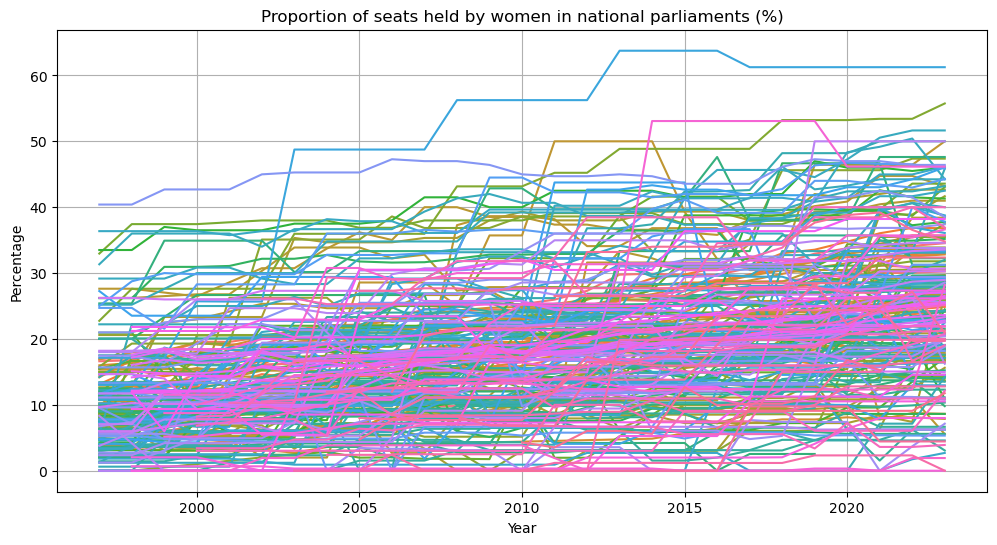

In [32]:
sample_indicator = "Proportion of seats held by women in national parliaments (%)"

sample_df = df_long[df_long["indicator_name"] == sample_indicator]

plt.figure(figsize=(12, 6))
sns.lineplot(data=sample_df, x="year", y="value", hue="country_name", legend=False)
plt.title(sample_indicator)
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.grid(True)
plt.show()


# Visualization

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Loading the cleaned data
df = pd.read_csv("cleaned_gender_data.csv")

# Quick preview
df.head()


country_name country_code  \
0  Africa Eastern and Southern          AFE   
1  Africa Eastern and Southern          AFE   
2  Africa Eastern and Southern          AFE   
3  Africa Eastern and Southern          AFE   
4  Africa Eastern and Southern          AFE   

                                      indicator_name  indicator_code  year  \
0  Adolescent fertility rate (births per 1,000 wo...     SP.ADO.TFRT  1960   
1  Age dependency ratio (% of working-age populat...     SP.POP.DPND  1960   
2               Birth rate, crude (per 1,000 people)  SP.DYN.CBRT.IN  1960   
3               Death rate, crude (per 1,000 people)  SP.DYN.CDRT.IN  1960   
4           Fertility rate, total (births per woman)  SP.DYN.TFRT.IN  1960   

        value  
0  135.793291  
1   88.967697  
2   47.437825  
3   20.909191  
4    6.723226

In [38]:
# List all unique indicator names in the dataset
df["indicator_name"].unique()


array(['Adolescent fertility rate (births per 1,000 women ages 15-19)',
       'Age dependency ratio (% of working-age population)',
       'Birth rate, crude (per 1,000 people)', ...,
       'Retirement age with full benefits, male',
       'Retirement age with partial benefits, female',
       'Retirement age with partial benefits, male'], dtype=object)

In [40]:
# Print sorted indicators
sorted(df["indicator_name"].unique().tolist())

['A woman can apply for a passport in the same way as a man (1=yes; 0=no)',
 'A woman can be "head of household" in the same way as a man (1=yes; 0=no)',
 'A woman can choose where to live in the same way as a man (1=yes; 0=no)',
 'A woman can get a job in the same way as a man (1=yes; 0=no)',
 'A woman can obtain a judgment of divorce in the same way as a man (1=yes; 0=no)',
 'A woman can open a bank account in the same way as a man (1=yes; 0=no)',
 'A woman can register a business in the same way as a man (1=yes; 0=no)',
 'A woman can sign a contract in the same way as a man (1=yes; 0=no)',
 'A woman can travel outside her home in the same way as a man (1=yes; 0=no)',
 'A woman can travel outside the country in the same way as a man (1=yes; 0=no)',
 'A woman can work at night in the same way as a man (1=yes; 0=no)',
 'A woman can work in a job deemed dangerous in the same way as a man (1=yes; 0=no)',
 'A woman can work in an industrial job in the same way as a man (1=yes; 0=no)',
 'A

In [42]:
from difflib import get_close_matches

# Try fuzzy matching to find similar indicator names
get_close_matches("Female literacy rate, adult (% of females ages 15 and above)", df["indicator_name"].unique(), n=5, cutoff=0.3)

['Literacy rate, adult female (% of females ages 15 and above)',
 'Literacy rate, adult male (% of males ages 15 and above)',
 'Literacy rate, adult total (% of people ages 15 and above)',
 'Literacy rate, youth female (% of females ages 15-24)',
 'Literacy rate, youth male (% of males ages 15-24)']

In [44]:
key_indicators = [
    "Proportion of seats held by women in national parliaments (%)",
    "Labor force participation rate for ages 15-24, female (%) (national estimate)",
    "Adolescent fertility rate (births per 1,000 women ages 15-19)",
    "Ratio of female to male youth unemployment rate (%) (national estimate)",
    "Women Business and the Law Index Score (scale 1-100)"
]

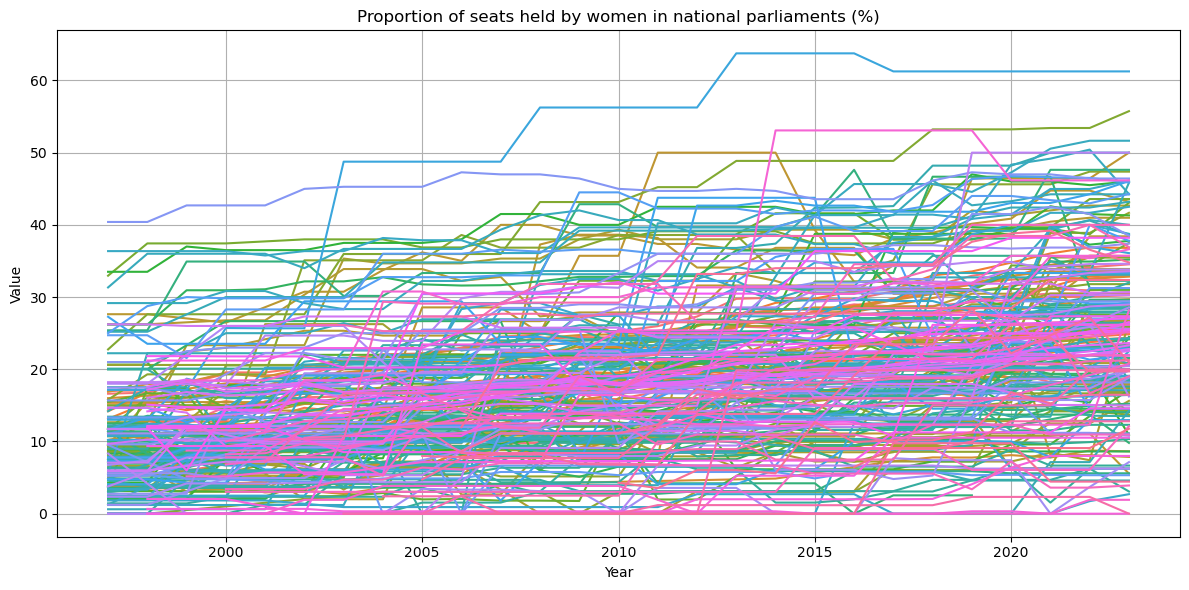

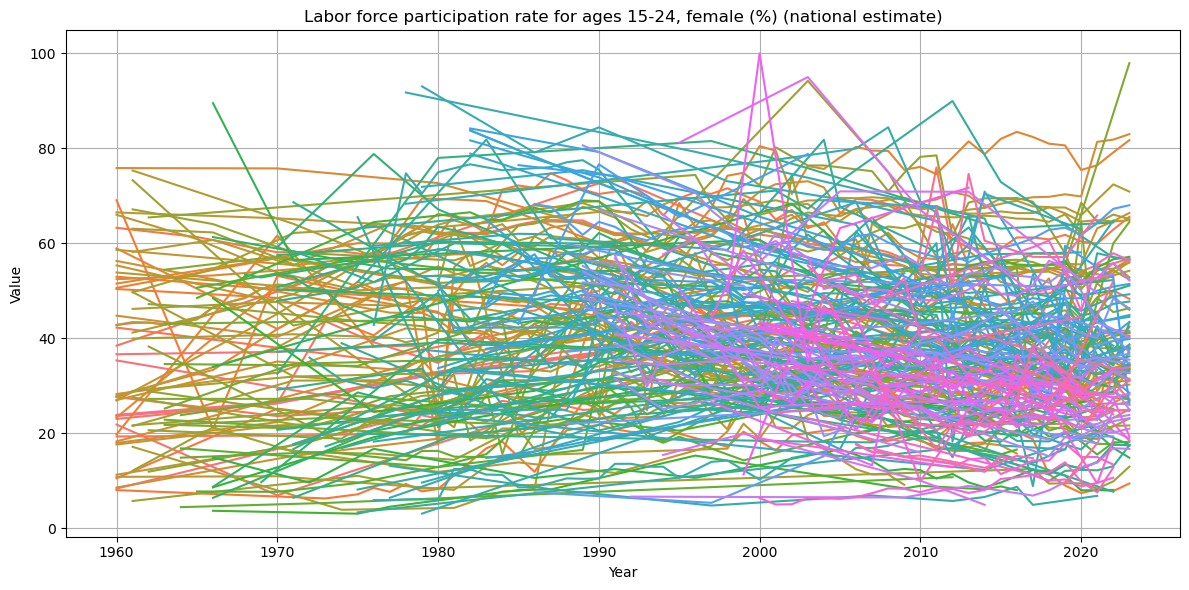

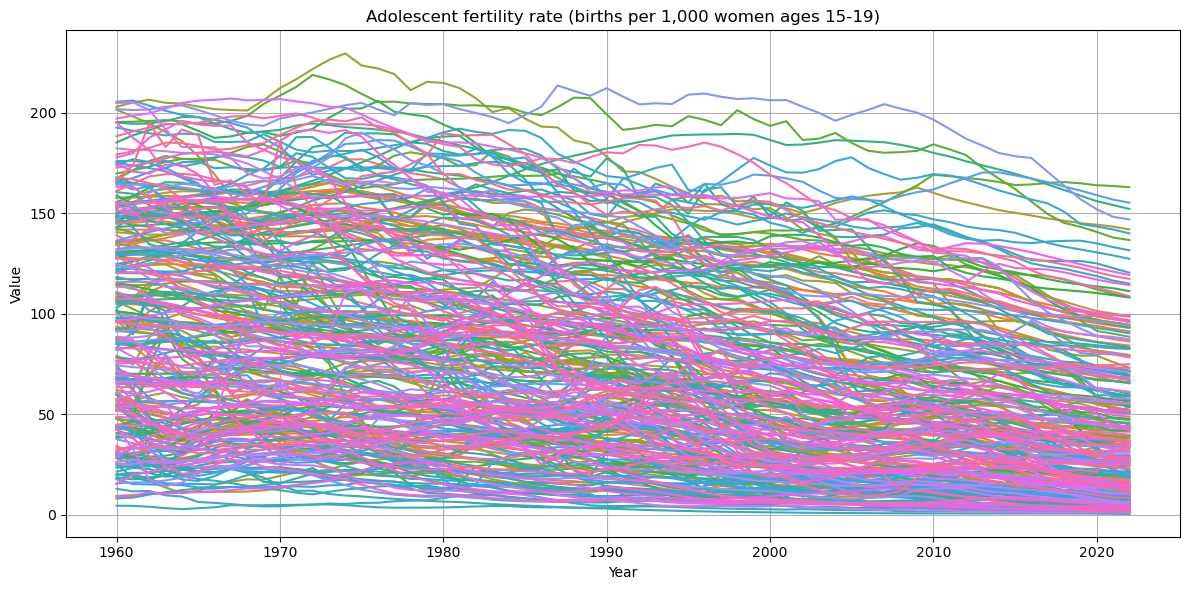

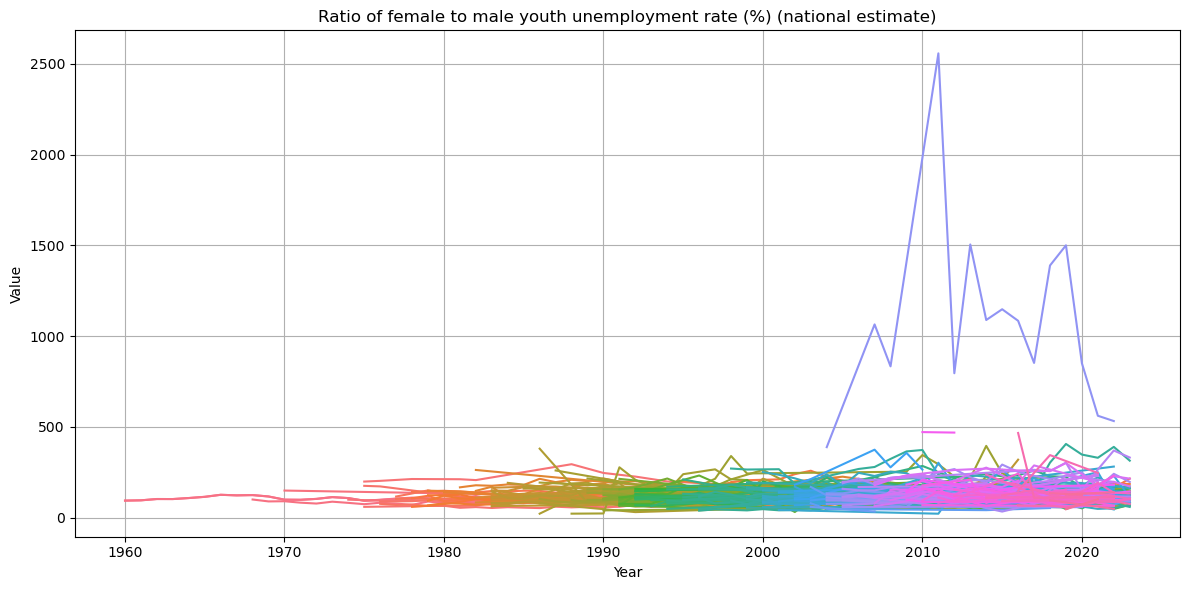

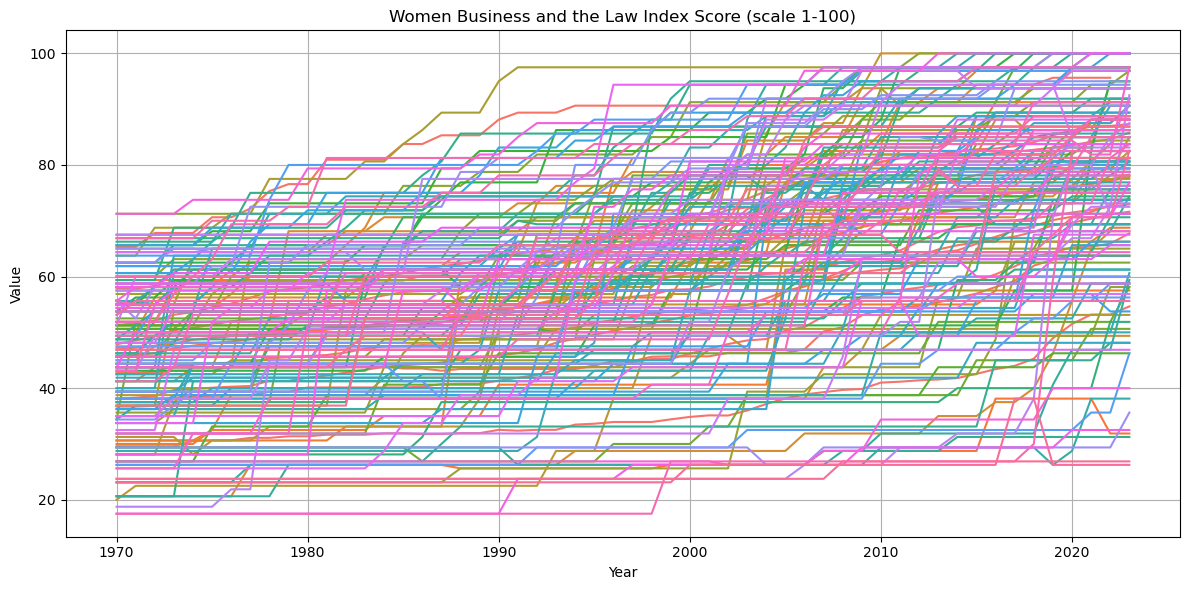

In [46]:
for indicator in key_indicators:
    subset = df[df["indicator_name"] == indicator]

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=subset, x="year", y="value", hue="country_name", legend=False)
    plt.title(indicator)
    plt.xlabel("Year")
    plt.ylabel("Value")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

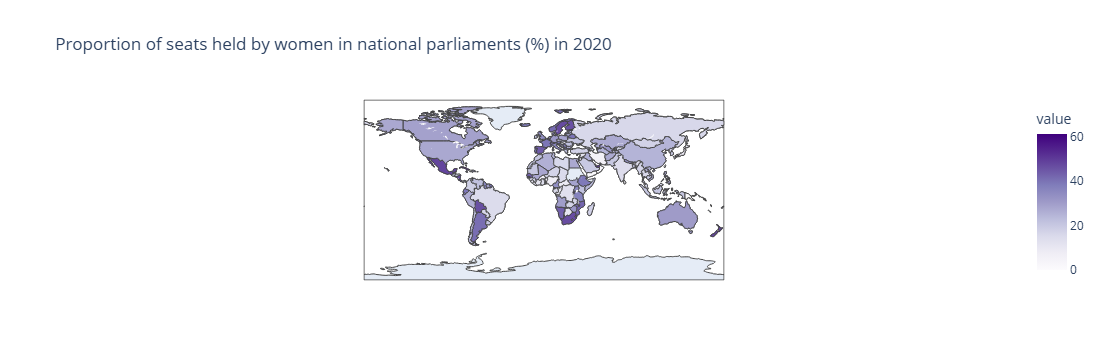

In [48]:
year = 2020
indicator = "Proportion of seats held by women in national parliaments (%)"
map_df = df[(df["indicator_name"] == indicator) & (df["year"] == year)]

fig = px.choropleth(
    map_df,
    locations="country_code",
    color="value",
    hover_name="country_name",
    color_continuous_scale="Purples",
    title=f"{indicator} in {year}"
)
fig.show()

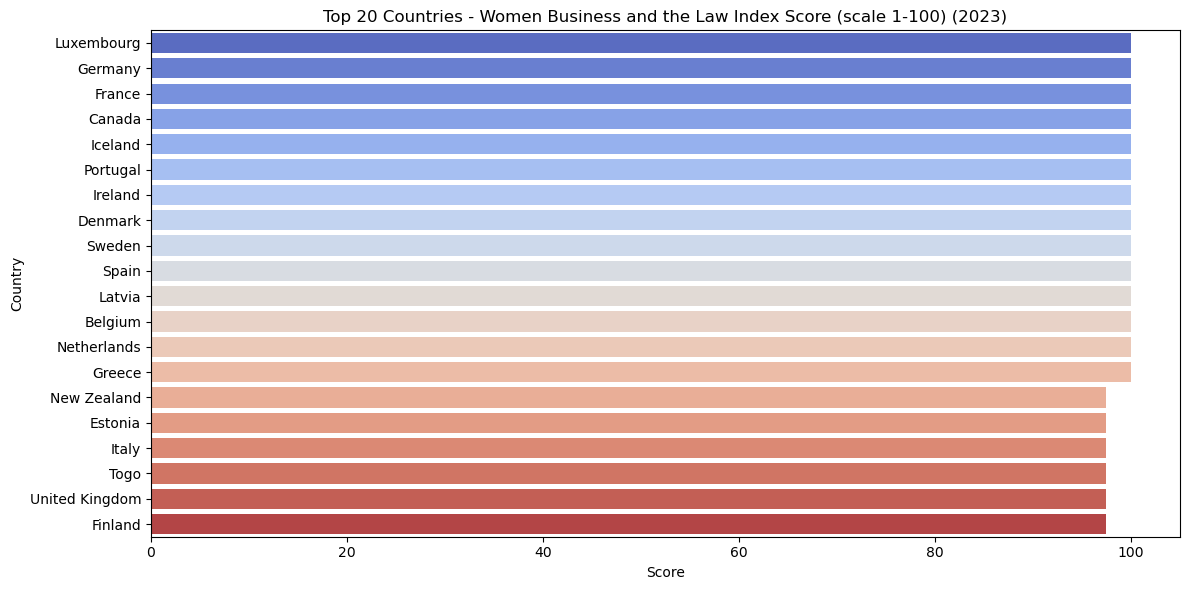

In [50]:
indicator = "Women Business and the Law Index Score (scale 1-100)"
latest_year = df[df["indicator_name"] == indicator]["year"].max()
bar_df = df[(df["indicator_name"] == indicator) & (df["year"] == latest_year)]

# Sort by value
top_20 = bar_df.sort_values("value", ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_20, x="value", y="country_name", palette="coolwarm")
plt.title(f"Top 20 Countries - {indicator} ({latest_year})")
plt.xlabel("Score")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


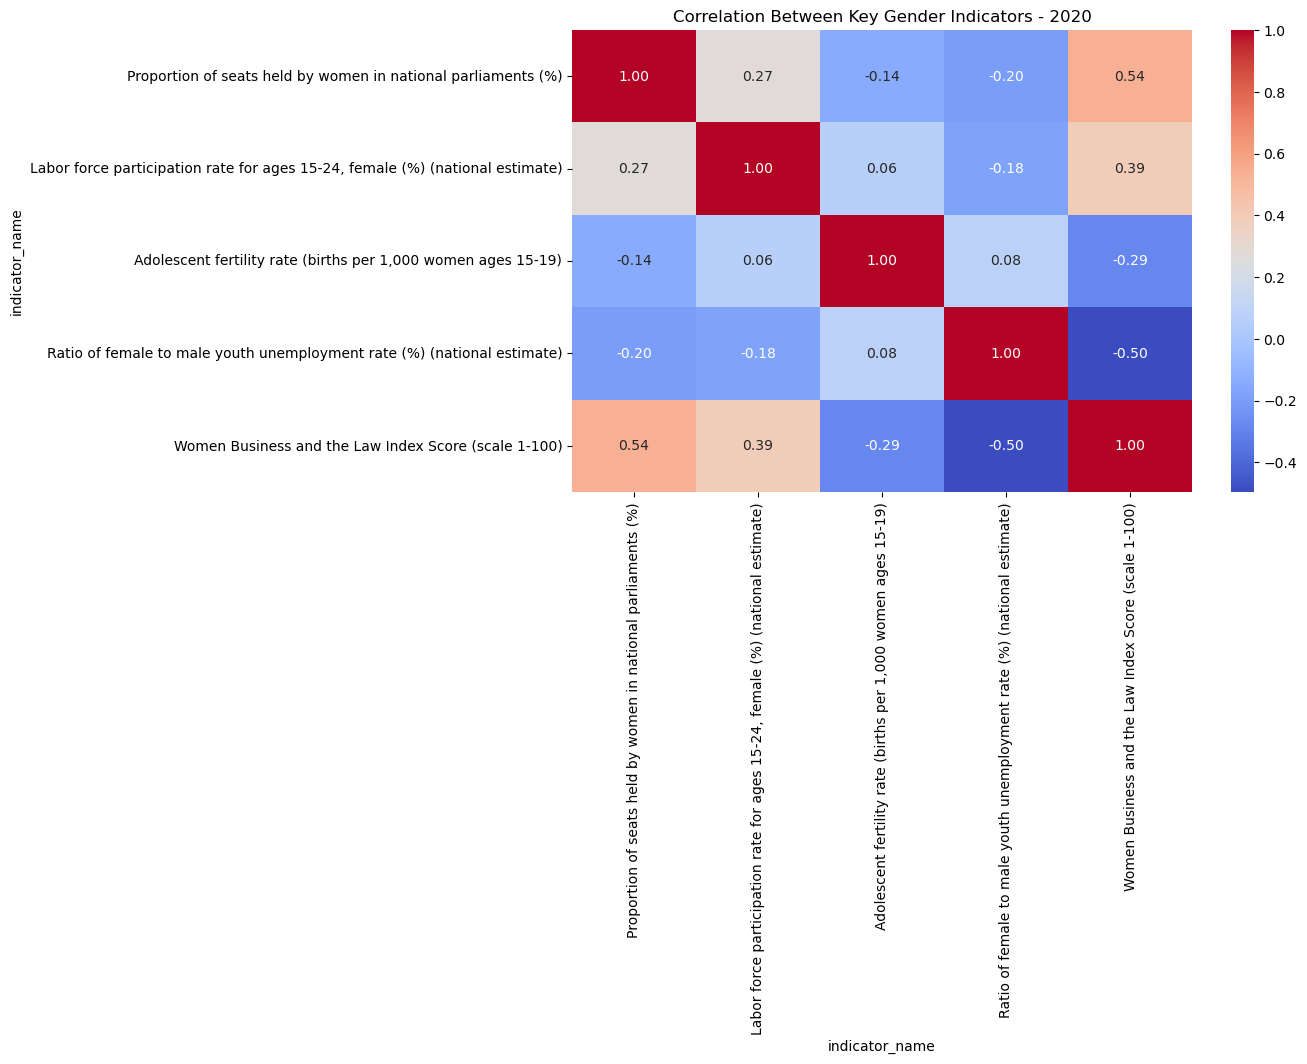

In [52]:
# Select one year for correlation analysis
corr_year = 2020

# Filter and pivot
pivot_df = df[df["year"] == corr_year]
pivot_df = pivot_df.pivot_table(index="country_name", columns="indicator_name", values="value")

# Calculate correlation
corr = pivot_df[key_indicators].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title(f"Correlation Between Key Gender Indicators - {corr_year}")
plt.tight_layout()
plt.show()

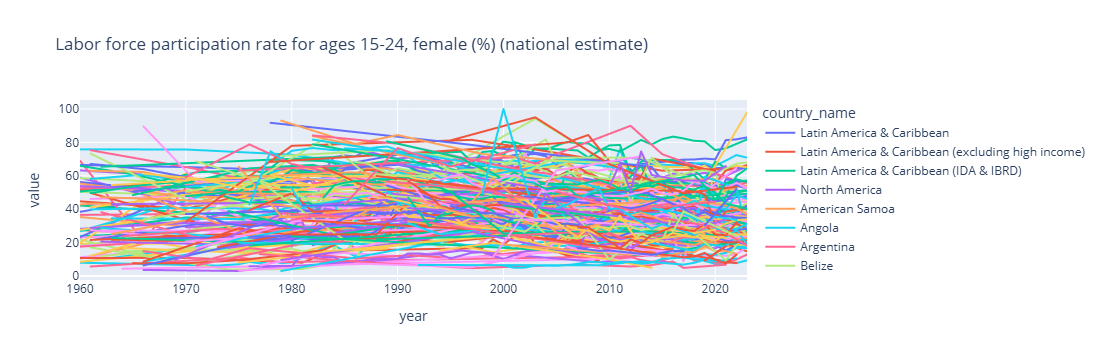

In [54]:
indicator = "Labor force participation rate for ages 15-24, female (%) (national estimate)"
subset = df[df["indicator_name"] == indicator]

fig = px.line(
    subset,
    x="year",
    y="value",
    color="country_name",
    title=indicator
)
fig.show()

# Analysis & Insights

In [57]:
focus_indicators = [
    "Proportion of seats held by women in national parliaments (%)",
    "Labor force participation rate for ages 15-24, female (%) (national estimate)",
    "Women Business and the Law Index Score (scale 1-100)",
    "Literacy rate, adult female (% of females ages 15 and above)"
]

In [59]:
# Create a dictionary (extend as needed)
region_map = {
    "India": "South Asia",
    "Pakistan": "South Asia",
    "Bangladesh": "South Asia",
    "United States": "North America",
    "Canada": "North America",
    "Kenya": "Sub-Saharan Africa",
    "Nigeria": "Sub-Saharan Africa",
    "Germany": "Europe & Central Asia",
    "France": "Europe & Central Asia",
    "Brazil": "Latin America & Caribbean",
    "Argentina": "Latin America & Caribbean",
    "China": "East Asia & Pacific",
    "Japan": "East Asia & Pacific",
    "Saudi Arabia": "Middle East & North Africa",
    "South Africa": "Sub-Saharan Africa",
}

In [61]:
df["indicator_name"].value_counts().head(20)

indicator_name
Population ages 15-64 (% of total)                    16960
Population, female (% of total)                       16960
Population ages 65 and above (% of total)             16960
Population ages 0-14 (% of total)                     16960
Population ages 45-49, female                         16930
Population ages 50-54, male                           16930
Population ages 25-29, male                           16930
Population ages 30-34, female                         16930
Population ages 30-34, male                           16930
Population ages 35-39, female                         16930
Population ages 35-39, male                           16930
Population ages 40-44, female                         16930
Population ages 40-44, male                           16930
Age dependency ratio (% of working-age population)    16930
Population ages 45-49, male                           16930
Population ages 50-54, female                         16930
Population ages 55-59, fe

In [63]:
def plot_country_trend(indicator, countries):
    data = df[df["indicator_name"] == indicator]
    data = data[data["country_name"].isin(countries)]

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=data, x="year", y="value", hue="country_name", marker='o')
    plt.title(f"{indicator} Over Time")
    plt.xlabel("Year")
    plt.ylabel("Value")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

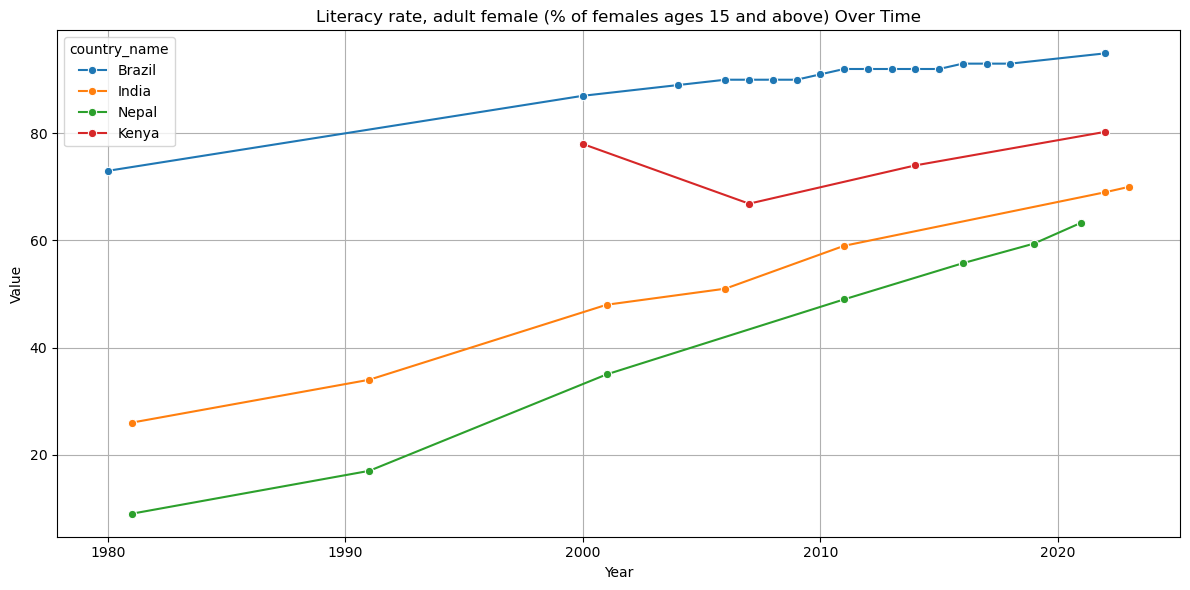

In [65]:
plot_country_trend("Literacy rate, adult female (% of females ages 15 and above)", ["India", "Nepal", "Kenya", "Brazil"])

In [67]:
def top_bottom_countries(indicator, year, top_n=10):
    data = df[(df["indicator_name"] == indicator) & (df["year"] == year)]
    top = data.sort_values(by="value", ascending=False).head(top_n)
    bottom = data.sort_values(by="value", ascending=True).head(top_n)

    fig, axs = plt.subplots(1, 2, figsize=(16, 6))

    sns.barplot(data=top, y="country_name", x="value", ax=axs[0], palette="Greens_r")
    axs[0].set_title(f"Top {top_n} Countries ({indicator}, {year})")

    sns.barplot(data=bottom, y="country_name", x="value", ax=axs[1], palette="Reds")
    axs[1].set_title(f"Bottom {top_n} Countries ({indicator}, {year})")

    plt.tight_layout()
    plt.show()


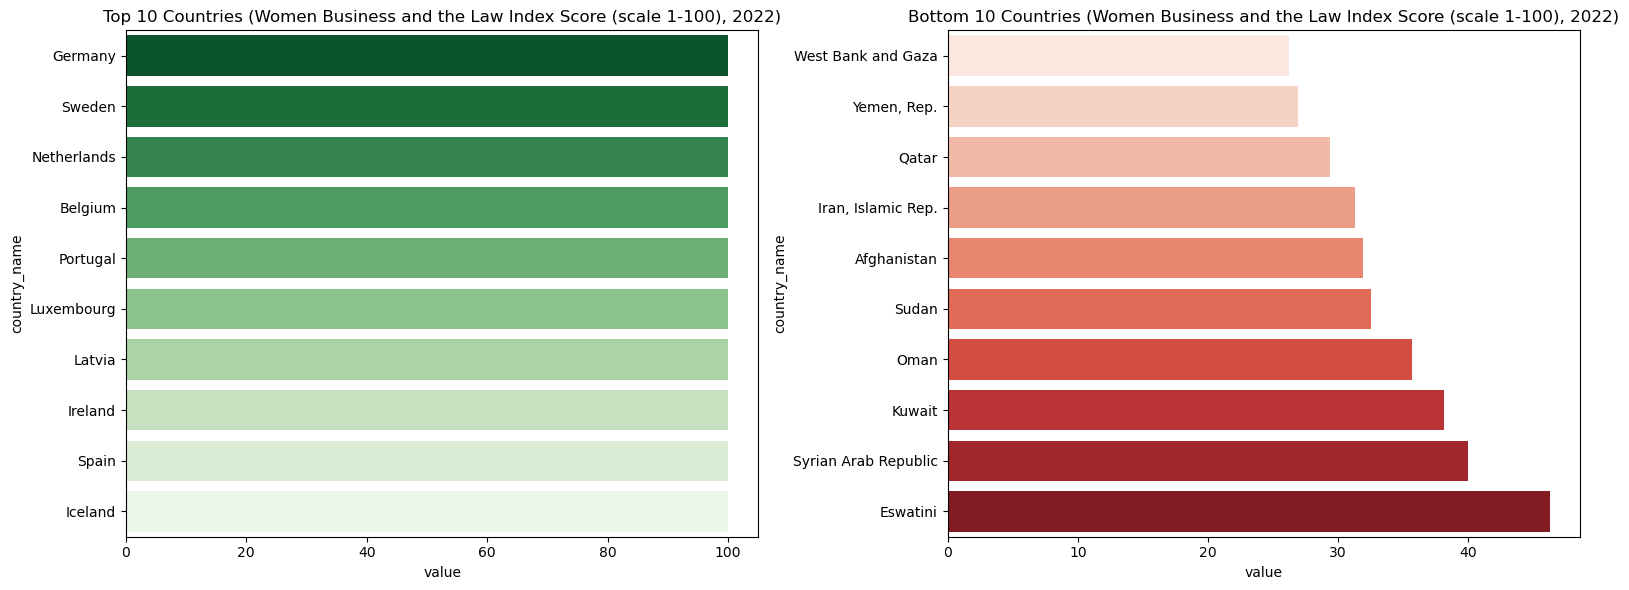

In [69]:
top_bottom_countries("Women Business and the Law Index Score (scale 1-100)", 2022)

In [71]:
def progress_over_time(indicator, start=2000, end=2023, top_n=10):
    df_sub = df[df["indicator_name"] == indicator]
    pivot = df_sub.pivot(index="country_name", columns="year", values="value")

    pivot["change_%"] = ((pivot[end] - pivot[start]) / pivot[start]) * 100
    pivot = pivot.dropna(subset=["change_%"])

    best = pivot["change_%"].sort_values(ascending=False).head(top_n)
    worst = pivot["change_%"].sort_values(ascending=True).head(top_n)

    # Plot
    plt.figure(figsize=(14, 6))
    sns.barplot(x=best.values, y=best.index, palette="coolwarm")
    plt.title(f"Top {top_n} Countries by % Improvement in '{indicator}' ({start}-{end})")
    plt.xlabel("Percentage Change")
    plt.ylabel("Country")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

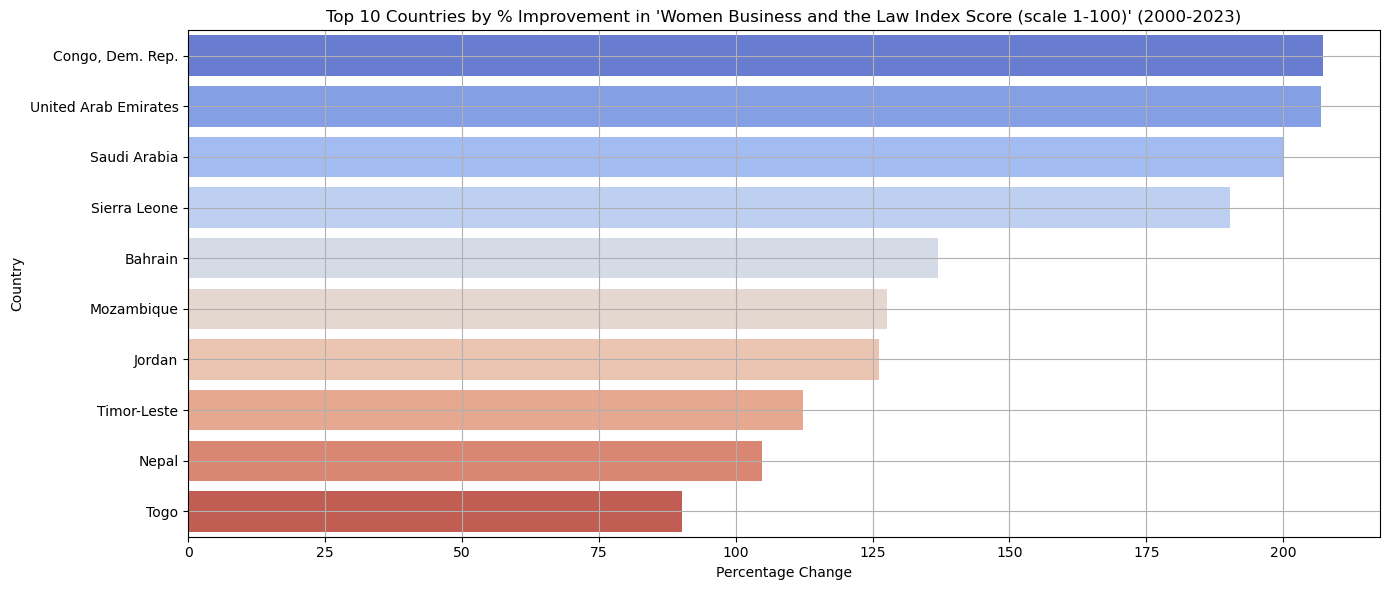

In [73]:
progress_over_time("Women Business and the Law Index Score (scale 1-100)", start=2000, end=2023)

In [75]:
def indicator_correlation(year):
    df_corr = df[df["year"] == year]
    pivot = df_corr.pivot_table(index="country_name", columns="indicator_name", values="value")

    # Filter only focus indicators
    selected = pivot[focus_indicators].dropna()
    corr = selected.corr()

    # Plot
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title(f"Correlation Between Gender Indicators ({year})")
    plt.tight_layout()
    plt.show()

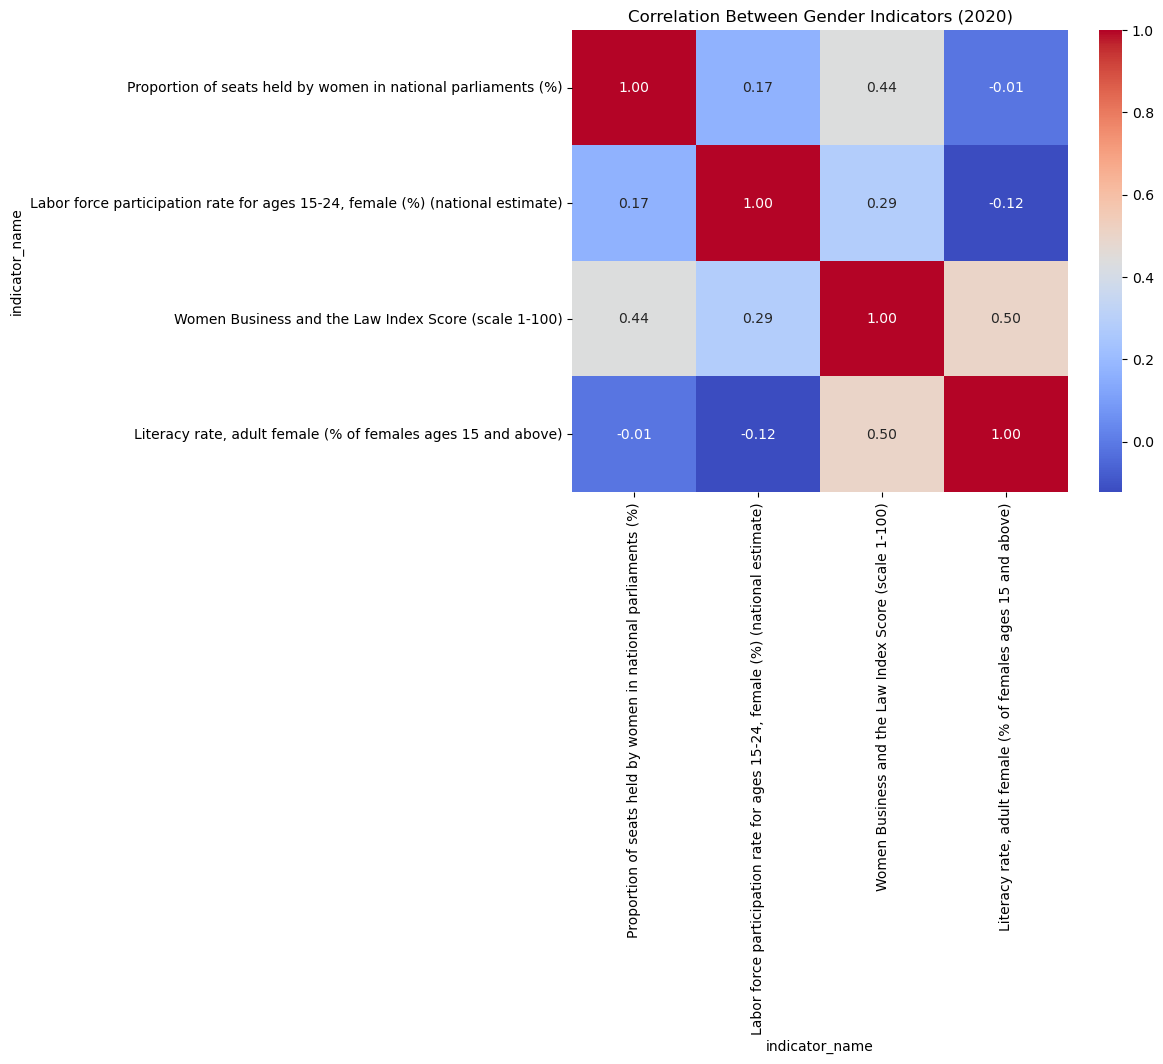

In [77]:
indicator_correlation(2020)

# END